In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("amazon_delivery.csv")

In [4]:
df

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43734,jlxf819993117,30,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,11:35:00,11:45:00,Windy,High,motorcycle,Metropolitian,160,Home
43735,aevx342135787,21,4.6,0.000000,0.000000,0.070000,0.070000,2022-02-16,19:55:00,20:10:00,Windy,Jam,motorcycle,Metropolitian,180,Jewelry
43736,xnek760674819,30,4.9,13.022394,80.242439,13.052394,80.272439,2022-03-11,23:50:00,00:05:00,Cloudy,Low,scooter,Metropolitian,80,Home
43737,cynl434665991,20,4.7,11.001753,76.986241,11.041753,77.026241,2022-03-07,13:35:00,13:40:00,Cloudy,High,motorcycle,Metropolitian,130,Kitchen


In [5]:
df.shape

(43739, 16)

In [6]:
df.describe()

,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Delivery_Time
count,43739.000000,43685.000000,43739.000000,43739.000000,43739.000000,43739.000000,43739.000000
mean,29.567137,4.633780,17.210960,70.661177,17.459031,70.821842,124.905645
std,5.815155,0.334716,7.764225,21.475005,7.342950,21.153148,51.915451
min,15.000000,1.000000,-30.902872,-88.366217,0.010000,0.010000,10.000000
25%,25.000000,4.500000,12.933298,73.170283,12.985996,73.280000,90.000000
50%,30.000000,4.700000,18.551440,75.898497,18.633626,76.002574,125.000000
75%,35.000000,4.900000,22.732225,78.045359,22.785049,78.104095,160.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,270.000000


In [7]:
df.columns

Index(['Order_ID', 'Agent_Age', 'Agent_Rating', 'Store_Latitude',
       'Store_Longitude', 'Drop_Latitude', 'Drop_Longitude', 'Order_Date',
       'Order_Time', 'Pickup_Time', 'Weather', 'Traffic', 'Vehicle', 'Area',
       'Delivery_Time', 'Category'],
      dtype='object')

In [8]:
df.isna().sum().sort_values(ascending = False)

Weather            91
Agent_Rating       54
Order_ID            0
Agent_Age           0
Store_Latitude      0
Store_Longitude     0
Drop_Latitude       0
Drop_Longitude      0
Order_Date          0
Order_Time          0
Pickup_Time         0
Traffic             0
Vehicle             0
Area                0
Delivery_Time       0
Category            0
dtype: int64

In [9]:
missing_values = df.isnull().sum()
missing_values_percentage = (missing_values / len(df)) * 100
missing_values_percentage

Order_ID           0.000000
Agent_Age          0.000000
Agent_Rating       0.123460
Store_Latitude     0.000000
Store_Longitude    0.000000
Drop_Latitude      0.000000
Drop_Longitude     0.000000
Order_Date         0.000000
Order_Time         0.000000
Pickup_Time        0.000000
Weather            0.208052
Traffic            0.000000
Vehicle            0.000000
Area               0.000000
Delivery_Time      0.000000
Category           0.000000
dtype: float64

In [10]:
df["Weather"].fillna("Unknown", inplace = True)
mean_rating = df["Agent_Rating"].mean()
df["Agent_Rating"].fillna(mean_rating, inplace = True)

In [11]:
df.isna().sum().sort_values(ascending = False)

Order_ID           0
Agent_Age          0
Agent_Rating       0
Store_Latitude     0
Store_Longitude    0
Drop_Latitude      0
Drop_Longitude     0
Order_Date         0
Order_Time         0
Pickup_Time        0
Weather            0
Traffic            0
Vehicle            0
Area               0
Delivery_Time      0
Category           0
dtype: int64

In [12]:
rating_delivery_corr = df[["Agent_Rating", "Delivery_Time"]].corr()
rating_delivery_corr

,Agent_Rating,Delivery_Time
Agent_Rating,1.000000,-0.289854
Delivery_Time,-0.289854,1.000000


In [13]:
orders_by_category = df['Category'].value_counts().reset_index()
orders_by_category.columns = ['Category', 'Order_Count']
orders_by_category

,Category,Order_Count
0,Electronics,2849
1,Books,2824
2,Jewelry,2802
3,Toys,2781
4,Skincare,2772
5,Snacks,2770
6,Outdoors,2747
7,Apparel,2726
8,Sports,2719
9,Grocery,2691


In [14]:
average_delivery_time = df["Delivery_Time"].mean()
max_delivery_time = df["Delivery_Time"].max()
min_delivery_time = df["Delivery_Time"].min()
deviation_of_delivery_time = df["Delivery_Time"].std()

average_delivery_time, max_delivery_time, min_delivery_time, deviation_of_delivery_time

# Большинство доставок занимают около 125 минут, но высокое отклонение указывает на значительную вариацию.
# Слишком долгая и слишком быстрая доставка могут значить ошибки в системе

(124.90564484784746, 270, 10, 51.915451300919194)

In [15]:
average_age = df["Agent_Age"].mean()
max_age = df["Agent_Age"].max()
min_age = df["Agent_Age"].min()

average_age, max_age, min_age

# Возраст до 18 лет может быть нелегальным.
# Возраст курьеров варьируется между 20 и 30

(29.567136880129862, 50, 15)

In [16]:
average_rating = df["Agent_Rating"].mean()
max_rating = df["Agent_Rating"].max()
min_rating = df["Agent_Rating"].min()

average_rating, max_rating, min_rating

# Среднее значение оценок это максимальные значения

(4.633780473846858, 6.0, 1.0)

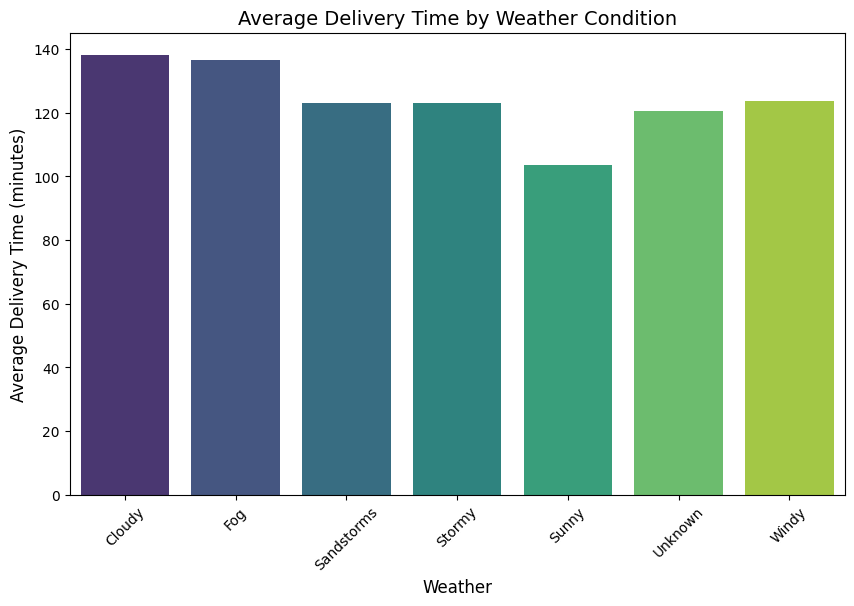

,Weather,Delivery_Time
0,Cloudy,138.286773
1,Fog,136.570833
2,Sandstorms,123.238509
3,Stormy,123.211825
4,Sunny,103.664453
5,Unknown,120.670330
6,Windy,123.658037


In [17]:
delivery_time_by_weather = df.groupby('Weather')['Delivery_Time'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Weather', y='Delivery_Time', data=delivery_time_by_weather, palette='viridis')
plt.title('Average Delivery Time by Weather Condition', fontsize=14)
plt.xlabel('Weather', fontsize=12)
plt.ylabel('Average Delivery Time (minutes)', fontsize=12)
plt.xticks(rotation=45)
plt.show()

delivery_time_by_weather

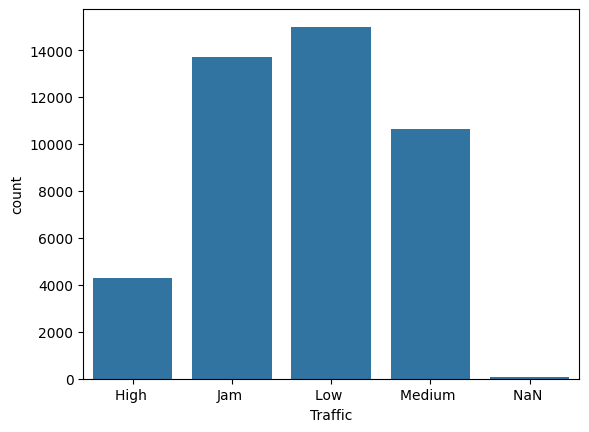

Traffic
High       129.424115
Jam        147.758980
Low        101.354557
Medium     126.839669
NaN        120.670330
Name: Delivery_Time, dtype: float64

In [18]:
delivery_time_by_traffic = df.groupby('Traffic')["Delivery_Time"].mean()
sns.countplot(x=df["Traffic"])
plt.show()
delivery_time_by_traffic

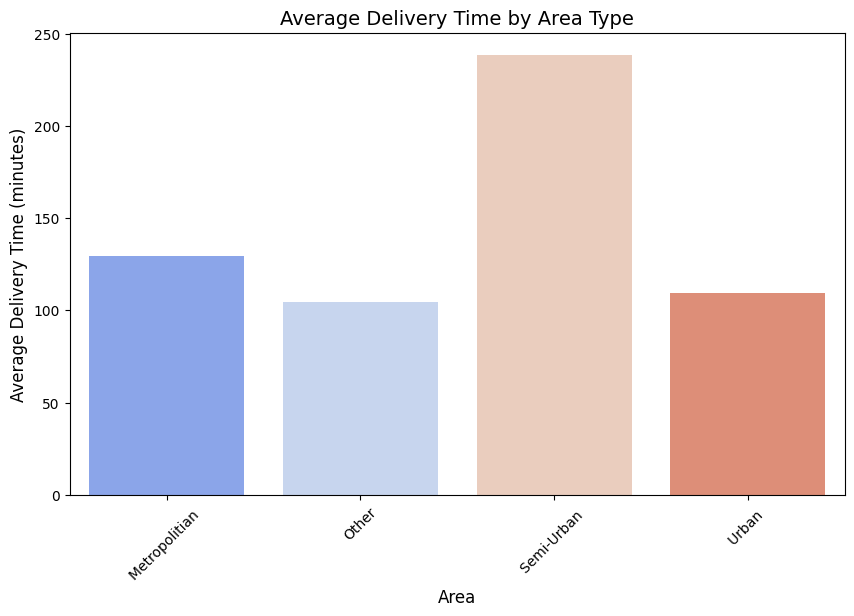

,Area,Delivery_Time
0,Metropolitian,129.702459
1,Other,104.464851
2,Semi-Urban,238.552632
3,Urban,109.434520


In [19]:
delivery_time_by_area = df.groupby('Area')['Delivery_Time'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Area', y='Delivery_Time', data=delivery_time_by_area, palette='coolwarm')
plt.title('Average Delivery Time by Area Type', fontsize=14)
plt.xlabel('Area', fontsize=12)
plt.ylabel('Average Delivery Time (minutes)', fontsize=12)
plt.xticks(rotation=45)
plt.show()

delivery_time_by_area

In [20]:
orders_by_vehicle = df['Vehicle'].value_counts().reset_index()
orders_by_vehicle.columns = ['Vehicle', 'Order_Count']
orders_by_vehicle

,Vehicle,Order_Count
0,motorcycle,25527
1,scooter,14639
2,van,3558
3,bicycle,15


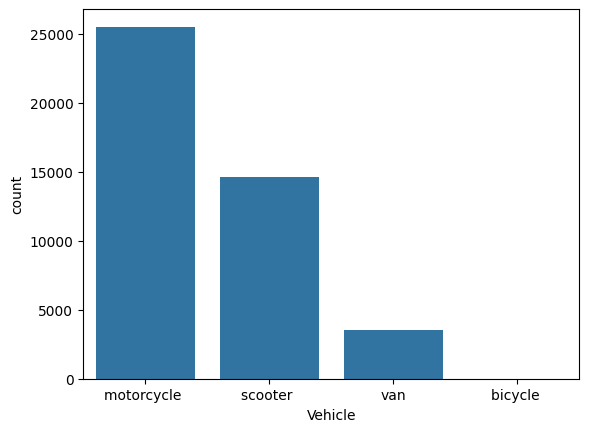

Vehicle
bicycle        127.000000
motorcycle     131.026325
scooter        116.361637
van            116.137156
Name: Delivery_Time, dtype: float64

In [21]:
delivery_time_by_vehicle = df.groupby('Vehicle')['Delivery_Time'].mean()
sns.countplot(x=df["Vehicle"])
plt.show()
delivery_time_by_vehicle